<a href="https://colab.research.google.com/github/Cauatn/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 90% 102M/113M [00:00<00:00, 169MB/s] 
100% 113M/113M [00:00<00:00, 131MB/s]


In [ ]:
import os
import pandas as pd

# Caminho para a pasta de fotos
photos_folder = "photos"

# Lista de arquivos na pasta
files_in_photos = os.listdir(photos_folder)

# Inicializa uma lista para armazenar os dados
data = []

# Itera sobre cada arquivo e atribui o rótulo
for filename in files_in_photos:
    # Extrai a primeira letra ou parte relevante do nome do arquivo
    if filename.startswith('m') or filename.startswith('m1'):
        label = 0  # Masculino
    elif filename.startswith('f') or filename.startswith('f1'):
        label = 1  # Feminino
    else:
        # Tratar casos inesperados
        print(f"Nome de arquivo {filename} não corresponde ao padrão esperado.")
        continue

    # Adiciona o nome do arquivo e o rótulo à lista de dados
    data.append({'filename': filename, 'label': label})

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

# Opcional: salva o DataFrame em um arquivo CSV para referência
df.to_csv('labels.csv', index=False)

# Exibe as primeiras linhas do DataFrame
print(df.head())

        filename  label
0   m-036-01.jpg      0
1   f-011-01.jpg      1
2   m-014-01.jpg      0
3   m-053-01.jpg      0
4  f1-012-01.jpg      1


In [ ]:
from PIL import Image
import numpy as np
from tqdm import tqdm  # Para a barra de progresso

# Lista para armazenar os dados das imagens e rótulos
images = []
labels = []

# Itera sobre cada linha do DataFrame
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # Caminho completo da imagem
    img_path = os.path.join(photos_folder, row['filename'])

    # Abre a imagem
    img = Image.open(img_path).convert('RGB')

    # Redimensiona a imagem
    img = img.resize((200, 250))  # (largura, altura)

    # Converte a imagem em um array numpy e normaliza
    img_array = np.asarray(img) / 255.0  # Normaliza para [0, 1]

    # Armazena os dados
    images.append(img_array)
    labels.append(row['label'])

# Converte as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

print(f"Shape das imagens: {images.shape}")
print(f"Shape dos rótulos: {labels.shape}")

100%|██████████| 188/188 [00:00<00:00, 403.29it/s]


Shape das imagens: (188, 250, 200, 3)
Shape dos rótulos: (188,)


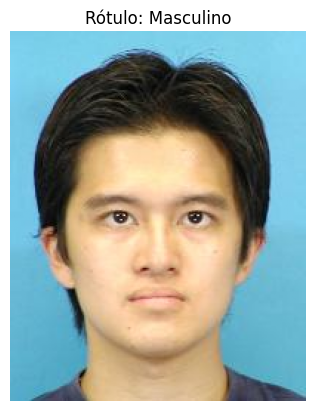

In [ ]:
# Exemplo de visualização de uma imagem e seu rótulo
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Rótulo: {'Masculino' if labels[0] == 0 else 'Feminino'}")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=23, stratify=labels)

# Divisão do conjunto temporário (80%) em treinamento e validação
# Para obter 50% treinamento e 30% validação do total inicial,
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.375, random_state=23, stratify=y_temp)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treinamento: 93
Tamanho do conjunto de validação: 57
Tamanho do conjunto de teste: 38


In [ ]:
total_samples = images.shape[0]

train_percentage = X_train.shape[0] / total_samples * 100
val_percentage = X_val.shape[0] / total_samples * 100
test_percentage = X_test.shape[0] / total_samples * 100

print(f"Porcentagem de treinamento: {train_percentage:.2f}%")
print(f"Porcentagem de validação: {val_percentage:.2f}%")
print(f"Porcentagem de teste: {test_percentage:.2f}%")

Porcentagem de treinamento: 49.47%
Porcentagem de validação: 30.32%
Porcentagem de teste: 20.21%


In [ ]:
import numpy as np
import tensorflow as tf
import random

seed_value = 23

# Python random
random.seed(seed_value)

# Numpy
np.random.seed(seed_value)

# TensorFlow
tf.random.set_seed(seed_value)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definição do modelo
model = Sequential()

# Camada convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# Camada convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Camada convolucional 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Achatar a saída e adicionar camadas totalmente conectadas
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Camada de saída
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar o resumo do modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 85376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,928,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,021,633 (42.04 MB)

 Trainable params: 11,021,633 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.6294 - loss: 0.9695 - val_accuracy: 0.7193 - val_loss: 0.5879
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7458 - loss: 0.5941 - val_accuracy: 0.7193 - val_loss: 0.5069
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7686 - loss: 0.5368 - val_accuracy: 0.8421 - val_loss: 0.4301
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8669 - loss: 0.4142 - val_accuracy: 0.8596 - val_loss: 0.3465
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8637 - loss: 0.3764 - val_accuracy: 0.8596 - val_loss: 0.3265
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8743 - loss: 0.2711 - val_accuracy: 0.8596 - val_loss: 0.3236
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8597 - loss: 0.2465 - val_accuracy: 0.8596 - val_loss: 0.3054
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9485 - loss: 0.2471 - val_accuracy: 0.8596 - val_loss: 0.2925
Epoch 9/

In [ ]:
# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.9194 - loss: 0.2742
Acurácia no conjunto de teste: 89.47%


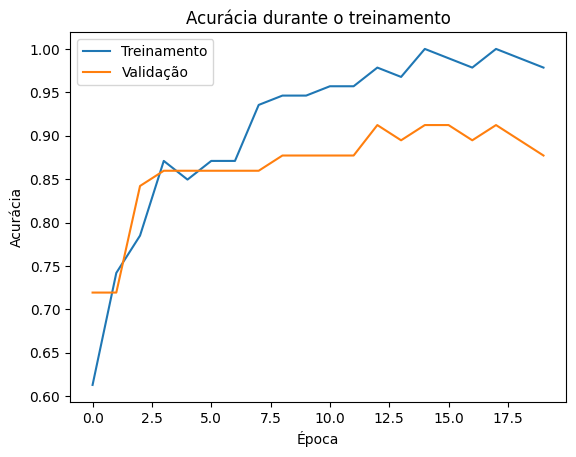

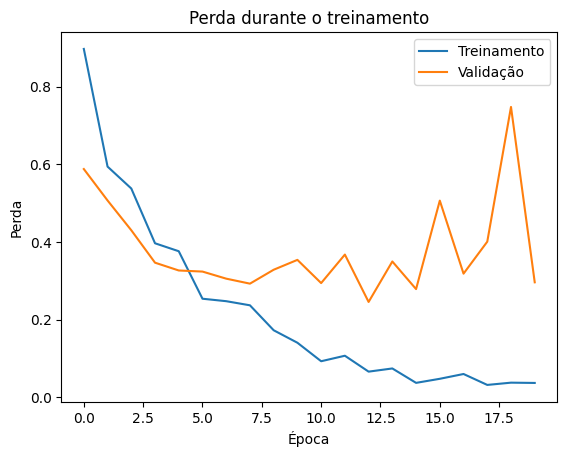

In [ ]:
import matplotlib.pyplot as plt

# Acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step
F1-Score: 0.8182
AUC-ROC: 0.9293
Matriz de Confusão:
[[25  2]
 [ 2  9]]


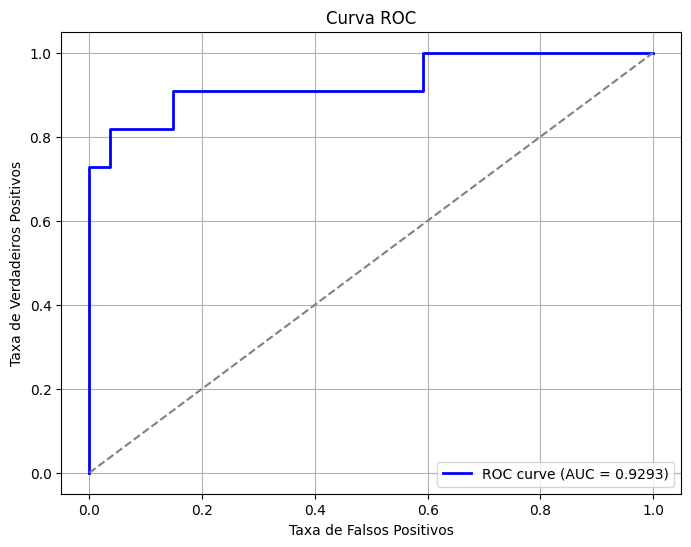

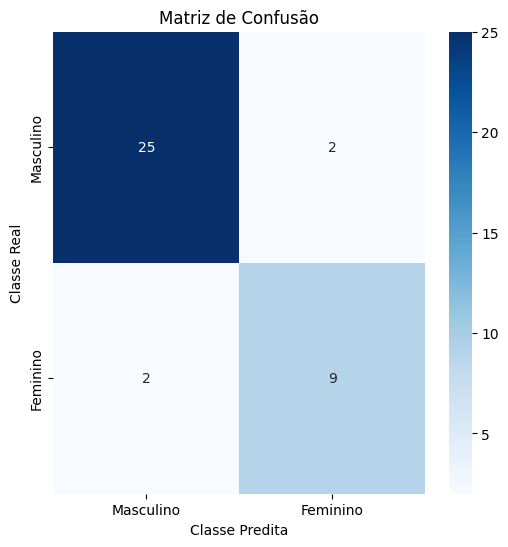

Número de imagens classificadas incorretamente: 4


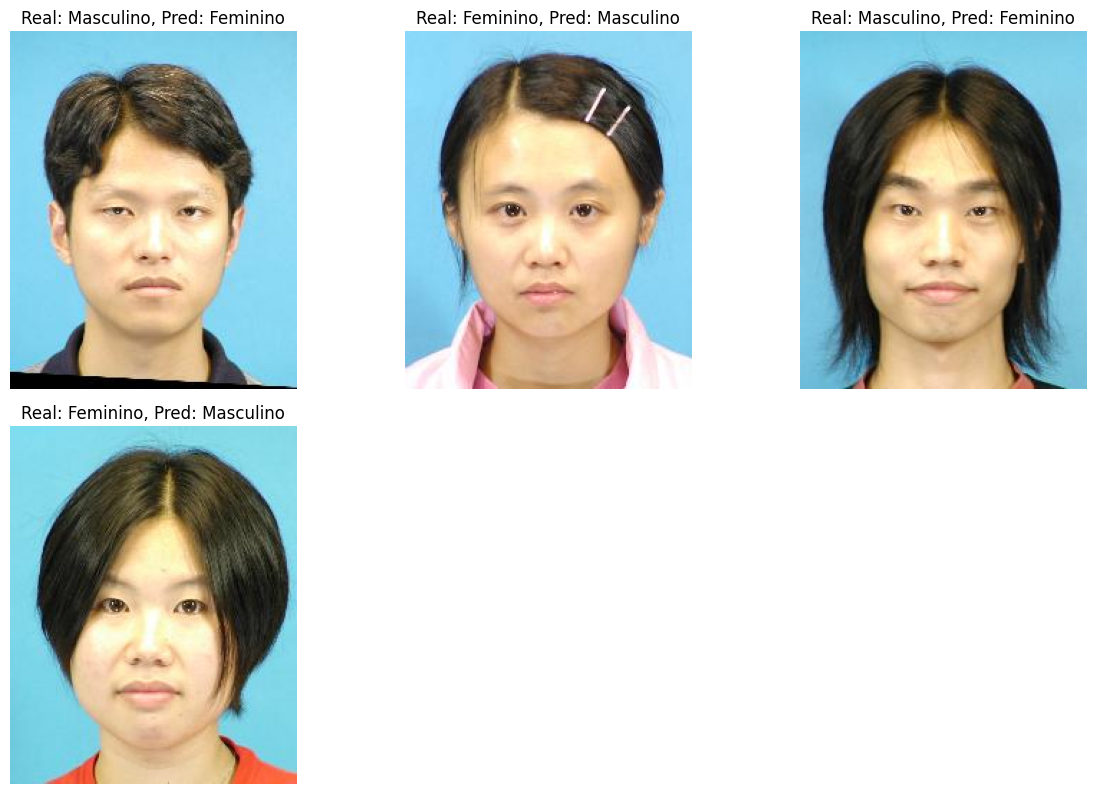

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Cálculo das Métricas de Avaliação

# Predições no conjunto de teste
y_pred_probs = model.predict(X_test).flatten()  # Probabilidades para a curva ROC
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Classes preditas (0 ou 1)


# Cálculo do F1-Score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1-Score: {f1:.4f}")

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusão:")
print(cm)

# 2. Visualização dos Resultados

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Heatmap Matriz de Confusão
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Masculino', 'Feminino'],
            yticklabels=['Masculino', 'Feminino'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

# 3. Análise de Imagens Classificadas Incorretamente

# Índices das imagens classificadas incorretamente
misclassified_indices = np.where(y_pred_classes != y_test)[0]
print(f"Número de imagens classificadas incorretamente: {len(misclassified_indices)}")

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow((X_test[idx] * 255).astype("uint8"))

    label_real = 'Masculino' if y_test[idx] == 0 else 'Feminino'
    label_pred = 'Masculino' if y_pred_classes[idx] == 0 else 'Feminino'

    plt.title(f"Real: {label_real}, Pred: {label_pred}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predições no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)
print('Matriz de Confusão:')
print(cm)

# Relatório de classificação
cr = classification_report(y_test, y_pred_classes, target_names=['Masculino', 'Feminino'])
print('Relatório de Classificação:')
print(cr)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step
Matriz de Confusão:
[[25  2]
 [ 2  9]]
Relatório de Classificação:
              precision    recall  f1-score   support

   Masculino       0.93      0.93      0.93        27
    Feminino       0.82      0.82      0.82        11

    accuracy                           0.89        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.89      0.89      0.89        38

